## Dataset 
The dataset is one of papers in NEBR: Sleep and the Allocation of Time by Biddle et al. They applied aggregated data from 12 countries including the cross section of microeconomic data, and a panel of households data. Authors found that an increased in time in the labor market will decrease the time of sleeping. 
Here is the link of the paper: https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Visualizing the dataframe

In [3]:
sleep = pd.read_csv('sleepdata.csv')

In [3]:
sleep.head(5)

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


In [4]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [5]:
sleep.describe().T

/Users/Kate/anaconda2/envs/econ/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
age,706.0,38.815864,11.342637,23.000000,29.00,36.000000,48.000000,65.000000
black,706.0,0.049575,0.217219,0.000000,0.00,0.000000,0.000000,1.000000
case,706.0,353.500000,203.948932,1.000000,177.25,353.500000,529.750000,706.000000
clerical,706.0,0.182331,0.335413,0.000000,0.00,0.000000,0.182331,1.000000
construc,706.0,0.030075,0.148366,0.000000,0.00,0.000000,0.030075,1.000000
educ,706.0,12.780453,2.784702,1.000000,12.00,12.000000,16.000000,17.000000
earns74,706.0,9767.705382,9323.588151,0.000000,2500.00,8250.000000,13750.000000,42500.000000
gdhlth,706.0,0.890935,0.311942,0.000000,1.00,1.000000,1.000000,1.000000
inlf,706.0,0.753541,0.431254,0.000000,1.00,1.000000,1.000000,1.000000
leis1,706.0,4690.723796,908.049561,1745.000000,4109.75,4620.000000,5203.750000,7417.000000


In [6]:
sleep.isnull().sum()

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64

#### Summary
* hrwage and lhrwage have 174 missing observations.

## 2. Droping missing values

In [4]:
# Drop NAN in the dataframe
sleep = sleep.dropna()

In [8]:
# Check the list of binary variables have values of 1 and 0 ????
sleep.isnull()[0:3]

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 3. Checking for correlations


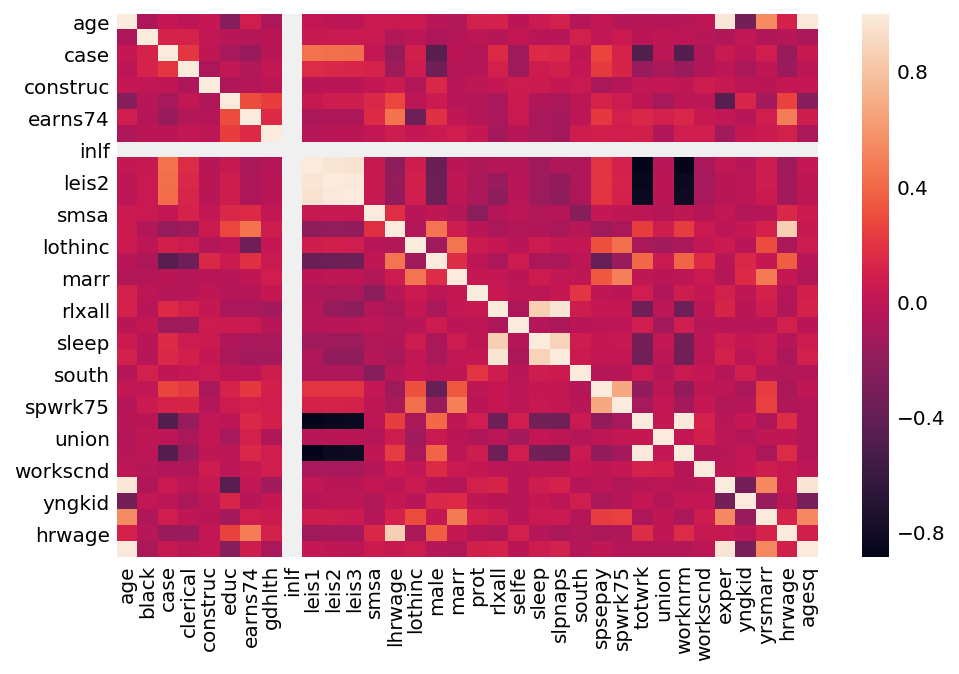

In [6]:
fig = plt.figure(figsize=(7,5))
ax = fig.gca()

sns.heatmap(sleep.corr(), ax=ax)
plt.show()

## 4 Predictions
    Dependent variable (y): minutes of sleep at night per week
    Independent variables (X): minutes worked per week, minutes worked in the main/2nd job

In [10]:
from patsy import dmatrices
import statsmodels.formula.api as smf
import patsy
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler

In [11]:
sleep.sleep.head(5)

0    3113
1    2920
2    2670
3    3083
4    3448
Name: sleep, dtype: int64

In [12]:
X = sleep[['totwrk','worknrm','workscnd']]
y = sleep.sleep.values

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

Xn = ss.fit_transform(X)

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xn, y, test_size=0.30)
print Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape 

(372, 3) (160, 3) (372,) (160,)


## 5 Appling machine-learning models 
    1. OLS, 
    2. Regularization methods (Lasso, Ridge, and Elastic Net)

### 5.1 OLS
    
---

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

model = lr.fit(Xtrain, ytrain)

In [16]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [17]:
def rsquare_meansquare_error(ytrain, ytest, Xtrain, Xtest, test, best_model):
    ytrain_pred = best_model.predict(Xtrain)
    ytest_pred = best_model.predict(Xtest)
    
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(ytrain, ytrain_pred),
        mean_squared_error(ytest, ytest_pred)))
    
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(ytrain, ytrain_pred),
        r2_score(ytest, ytest_pred)))

In [18]:
rsquare_meansquare_error(ytrain, ytest, Xtrain, Xtest, "OLS", lr)

MSE OLS train data: 155349.10, test data: 191196.20
R^2 OLS train data: 0.11, test data: 0.08


In [19]:
ytrain_pred = lr.predict(Xtrain)
ytest_pred = lr.predict(Xtest)
ytest_pred.shape

(160,)

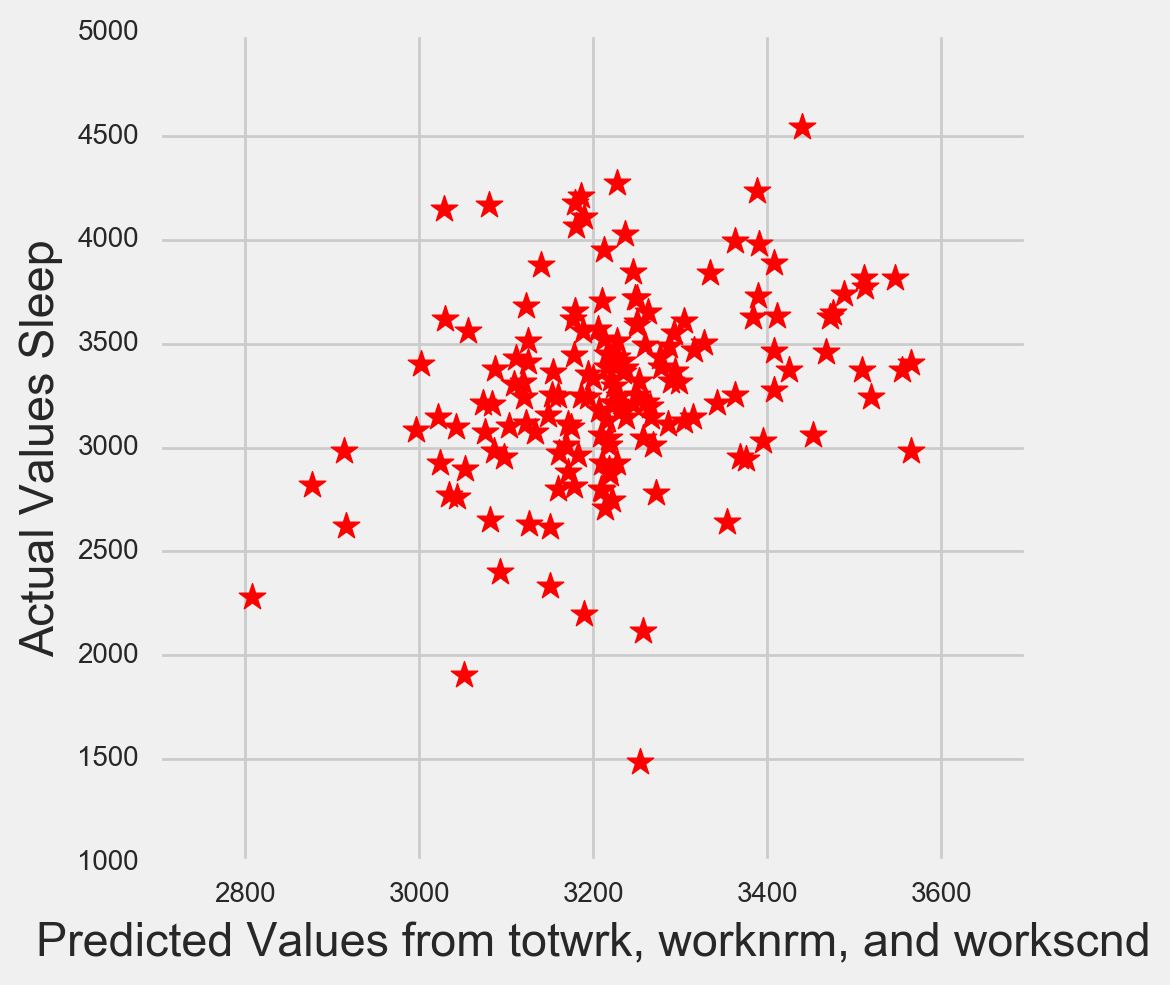

In [20]:
fig = plt.figure(figsize=(5,5))
plt.scatter(ytest_pred, ytest, s=100, color='red', marker='*')
plt.xlabel("Predicted Values from totwrk, worknrm, and workscnd")
plt.ylabel("Actual Values Sleep")
plt.show()

### 5.2 Regularization
    
---

In [21]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

#### Ridge

In [22]:
ridge_alphas = np.logspace(0, 5, 100)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xtrain, ytrain)

print (optimal_ridge.alpha_)

83.0217568132


In [23]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge.fit(Xtrain, ytrain)
ytrain_pred_ridge = ridge.predict(Xtrain)
ytest_pred_ridge = ridge.predict(Xtest)

In [24]:
print ridge.fit(Xtrain, ytrain)

Ridge(alpha=83.021756813197442, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)


In [25]:
print(ridge.coef_)

[-62.69401328 -63.16709451   1.25318954]


In [26]:
print('MSE - Ridge train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred_ridge),
        mean_squared_error(ytest, ytest_pred_ridge)))
print('R^2 - Ridge train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred_ridge),
        r2_score(ytest, ytest_pred_ridge)))

MSE - Ridge train: 155545.991, test: 191330.786
R^2 - Ridge train: 0.111, test: 0.084


#### Lasso

In [27]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xtrain, ytrain)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

17.6207669281


...........................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [28]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso.fit(Xtrain, ytrain)
ytrain_pred_lasso = lasso.predict(Xtrain)
ytest_pred_lasso = lasso.predict(Xtest)

In [29]:
print lasso.fit(Xtrain, ytrain)

Lasso(alpha=17.620766928138092, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [30]:
print(lasso.coef_)

[-48.77503087 -73.48630708  -0.        ]


In [31]:
print('MSE - Lasso train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred_lasso),
        mean_squared_error(ytest, ytest_pred_lasso)))
print('R^2 - Lasso train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred_lasso),
        r2_score(ytest, ytest_pred_lasso)))

MSE - Lasso train: 155658.397, test: 191450.964
R^2 - Lasso train: 0.110, test: 0.084


#### ElasticNetCV

In [32]:
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(Xtrain, ytrain)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

17.1705788299
1.0


...................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    7.0s finished


In [33]:
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet.fit(Xtrain, ytrain)
ytrain_pred_enet = enet.predict(Xtrain)
ytest_pred_enet = enet.predict(Xtest)

In [34]:
print enet.fit(Xtrain, ytrain)

ElasticNet(alpha=17.170578829922732, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)


In [35]:
print(enet.coef_)

[-49.0218772  -73.68811433  -0.        ]


In [36]:
print('MSE - ElasticNet train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred_enet),
        mean_squared_error(ytest, ytest_pred_enet)))
print('R^2 - ElasticNet train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred_enet),
        r2_score(ytest, ytest_pred_enet)))

MSE - ElasticNet train: 155642.791, test: 191436.896
R^2 - ElasticNet train: 0.110, test: 0.084


### Summary
* None of my features has the coefficient, which is greater than 0. They all show negative relationships with mins of sleep at night, per week.

## 6 Plotting the distribution of residuals on both train and test data


In [37]:
ols_resd_train  = ytrain - ytrain_pred
ols_resd_test = ytest - ytest_pred

ridge_resd_train = ytrain - ytrain_pred_ridge
ridge_resd_test = ytest - ytest_pred_ridge

lasso_resd_train = ytrain - ytrain_pred_lasso
lasso_resd_test = ytest - ytest_pred_lasso

enet_resd_train = ytrain - ytrain_pred_enet
enet_resd_test = ytest - ytest_pred_enet

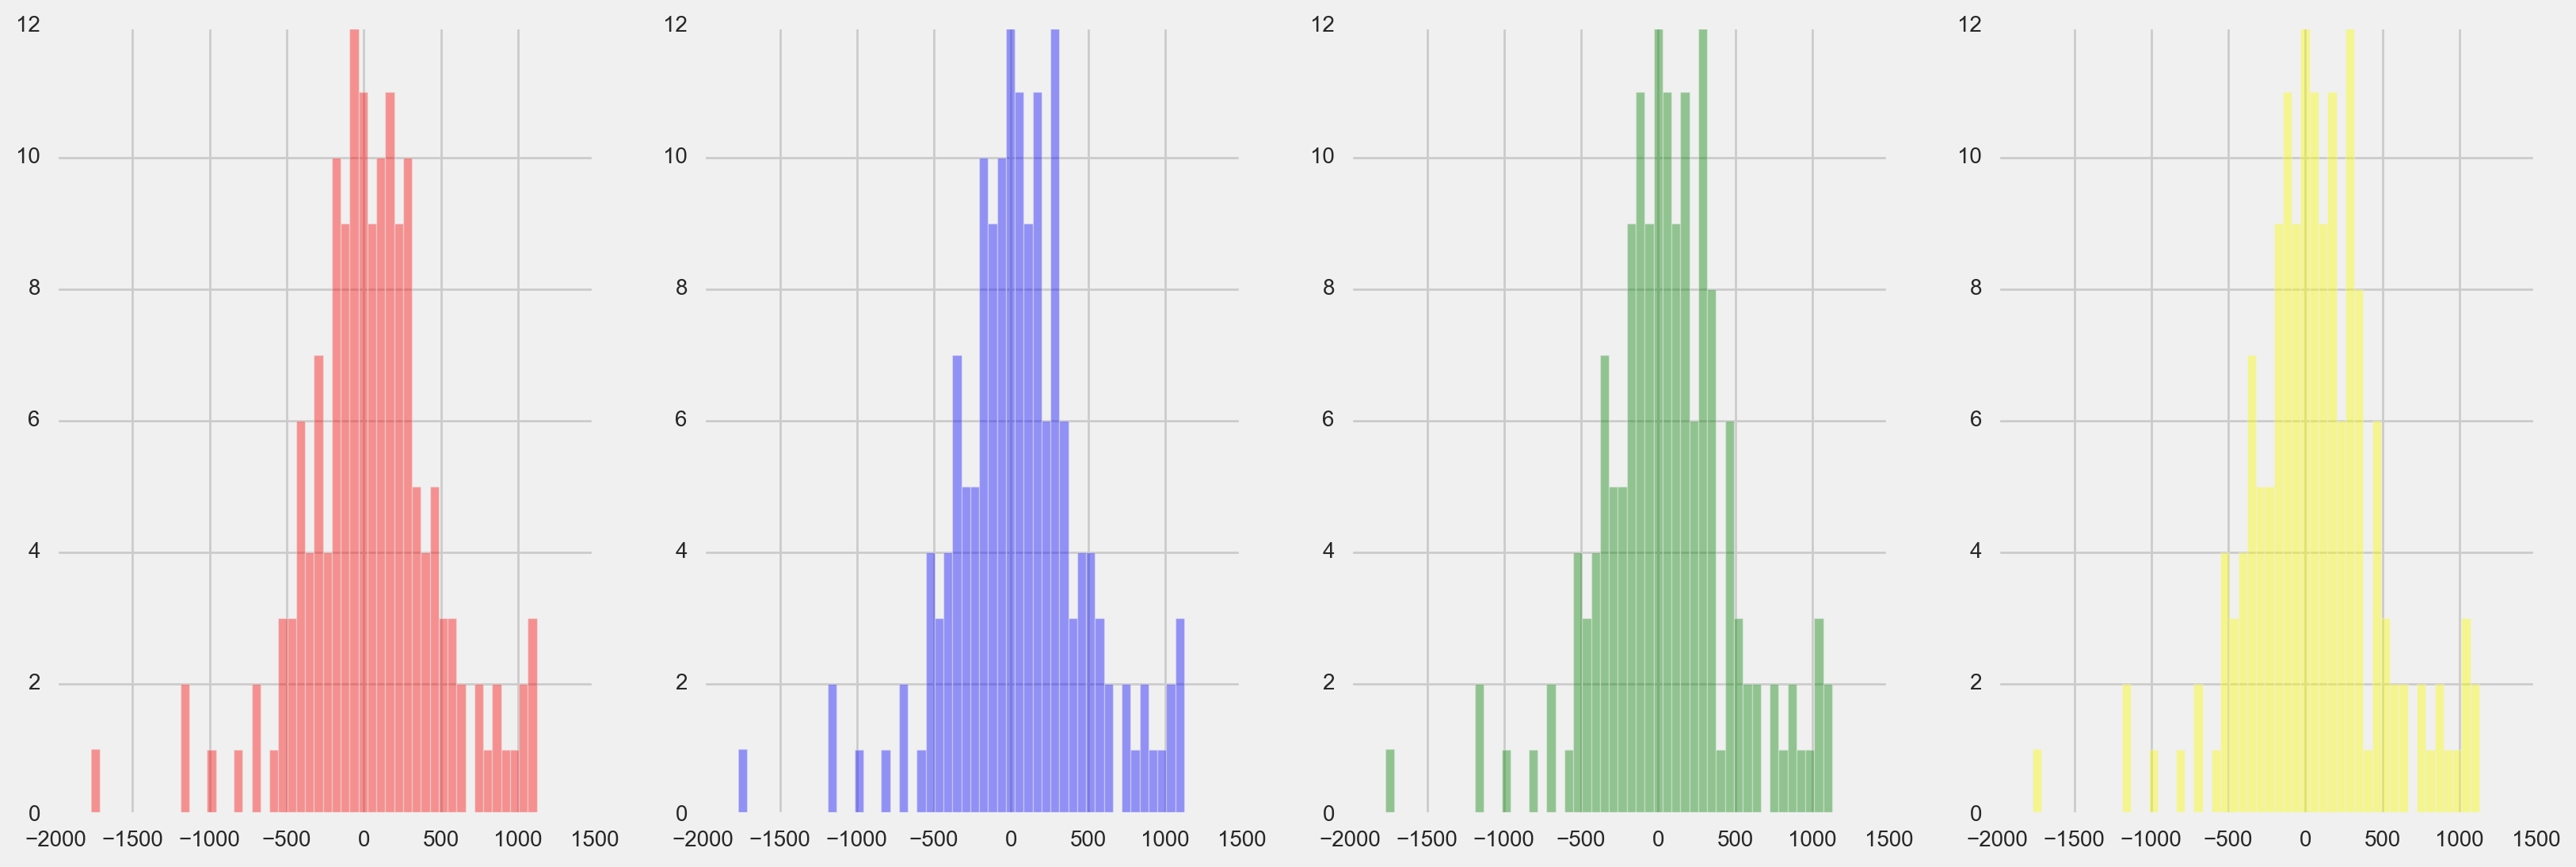

In [38]:
fig, axarr = plt.subplots(1, 4, figsize=(18, 6))

sns.distplot(ols_resd_test, bins=50, hist=True, kde=False, 
             color='red', ax=axarr[0], label='OLS residuals')


sns.distplot(ridge_resd_test, bins=50, hist=True, kde=False, 
             color='blue', ax=axarr[1], label='Ridge residuals')


sns.distplot(lasso_resd_test, bins=50, hist=True, kde=False, 
             color='green', ax=axarr[2], label='Lasso residuals')

sns.distplot(enet_resd_test, bins=50, hist=True, kde=False, 
             color='yellow', ax=axarr[3], label='ElasticNet residuals')

plt.show()

## 7 Regression Tree 

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [40]:
dtr_gs.fit(Xtrain, ytrain)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [41]:
dtr_best = dtr_gs.best_estimator_ 

print "Best estimator", dtr_best
print "\n=====\n"
print "Best paramers",  dtr_gs.best_params_
print "\n=====\n"
print "Best score", dtr_gs.best_score_

Best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=7,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

=====

Best paramers {'max_features': None, 'min_samples_split': 7, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 10}

=====

Best score 0.050349492518


In [42]:
y_pred_dtr= dtr_best.predict(Xtest)
y_pred_dtr

array([ 3297.66666667,  3297.66666667,  3297.66666667,  3144.88405797,
        3373.31764706,  3373.31764706,  3244.30434783,  3622.76190476,
        3144.88405797,  3297.66666667,  3244.30434783,  3144.88405797,
        3144.88405797,  3144.88405797,  3144.88405797,  3373.31764706,
        3244.30434783,  3144.88405797,  3144.88405797,  3144.88405797,
        3244.30434783,  3144.88405797,  3297.66666667,  3144.88405797,
        3144.88405797,  3297.66666667,  3297.66666667,  3297.66666667,
        3373.31764706,  3144.88405797,  3144.88405797,  3297.66666667,
        3144.88405797,  2564.9       ,  3373.31764706,  3244.30434783,
        3144.88405797,  3144.88405797,  3373.31764706,  2564.9       ,
        3144.88405797,  3373.31764706,  3244.30434783,  3297.66666667,
        3297.66666667,  3622.76190476,  3297.66666667,  3297.66666667,
        3144.88405797,  3373.31764706,  3622.76190476,  3297.66666667,
        3144.88405797,  3144.88405797,  3144.88405797,  3297.66666667,
      

In [43]:
def rsquare_meansquare_error(ytrain, ytest, Xtrain, Xtest, test, best_model):
    ytrain_pred = best_model.predict(Xtrain)
    ytest_pred = best_model.predict(Xtest)
    
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(ytrain, ytrain_pred),
        mean_squared_error(ytest, ytest_pred)))
    
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(ytrain, ytrain_pred),
        r2_score(ytest, ytest_pred)))

In [44]:
rsquare_meansquare_error(ytrain, ytest, Xtrain, Xtest, "Regression tree", dtr_best)

MSE Regression tree train data: 146495.21, test data: 200435.40
R^2 Regression tree train data: 0.16, test data: 0.04


In [45]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot

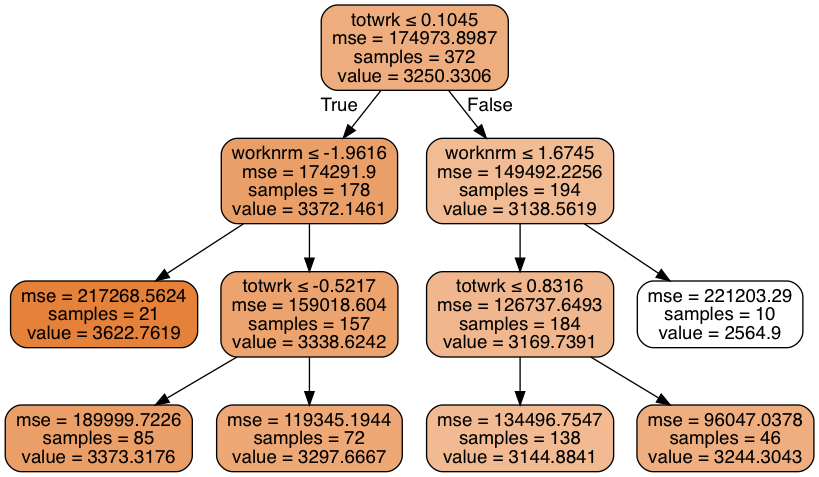

In [46]:
dot_data = StringIO()

export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 7.1 Random Forest Regression Tree




In [47]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5], 
          'max_features':[None, 'auto'], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [48]:
estimator_rfr.fit(Xtrain, ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   19.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [49]:
rfr_best = estimator_rfr.best_estimator_
print "Best estimator", rfr_best
print "\n=====\n"
print "Best parameters", estimator_rfr.best_params_
print "\n=====\n"
print "Best score", estimator_rfr.best_score_

Best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=None, max_leaf_nodes=5, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

=====

Best parameters {'max_features': None, 'max_leaf_nodes': 5, 'min_samples_split': 3, 'n_estimators': 100, 'max_depth': 4}

=====

Best score 0.0757917972757


In [50]:
def Importance(X, best_model):
    Importance = pd.DataFrame({'Feature':X.columns, 'Importance':best_model.feature_importances_})
    Importance.sort_values('Importance', ascending=False, inplace=True)
    return Importance  

In [51]:
Importance(X, rfr_best)

,Feature,Importance
0,totwrk,0.536897
1,worknrm,0.449676
2,workscnd,0.013427


In [52]:
def rsquare_meansquare_error(ytrain, ytest, Xtrain, Xtest, test, best_model):
    ytrain_pred = best_model.predict(Xtrain)
    ytest_pred = best_model.predict(Xtest)
    
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(ytrain, ytrain_pred),
        mean_squared_error(ytest, ytest_pred)))
    
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(ytrain, ytrain_pred),
        r2_score(ytest, ytest_pred)))

In [53]:
rsquare_meansquare_error(ytrain, ytest, Xtrain, Xtest, "Random Regression tree", rfr_best)

MSE Random Regression tree train data: 141115.95, test data: 194336.80
R^2 Random Regression tree train data: 0.19, test data: 0.07


## 8 Conclusion
* The random regression tree has better explaning power than the original regression tree for the former has lower MSE and the test R-squared is positive.
* I can tell that the mins worked per week (totwrk) has the best explaining power for mins sleep at night per week (sleep) for the its importance is 0.492025.
* After doing comparisons among 4 different method, ElasticNet has the lowest MSE on both train and test data. Therefore I can conclude that ElasticNet is the ideal method to predict my linear regression model.
* The R-squared in all my 4 method are alomost the same, but the MSEs are different. Since I have almost identical R-squared, I use MSE as the criteria. The smaller the MSE, the better the model predict the "truth". Also, less variance will exist in my model.
* After doing both regression tree and random regression tree method, the values of R-squared are identical, but the sign is different (in test data). The R-squared in test data of regression tree is -0.03, which is a really bad result. So, I used the random regression tree method. Since values of R-squared are the same, MSE is my main criteira to choose the model. The random regression tree method has small MSE (test:180612.48) and the variance of this method is also samll. Thus, I have the same result as using 4 regulationized method.

### Source
Applied Econometrics in IDEC program at USF 